In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# adfuller - performs augmented Dickey Fuller Test (to check if your data is stationary)


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Algorithms/AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.columns =['Month','Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
# we need to convert time column to index. in case of time series analysis

In [8]:
df.set_index('Month',inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


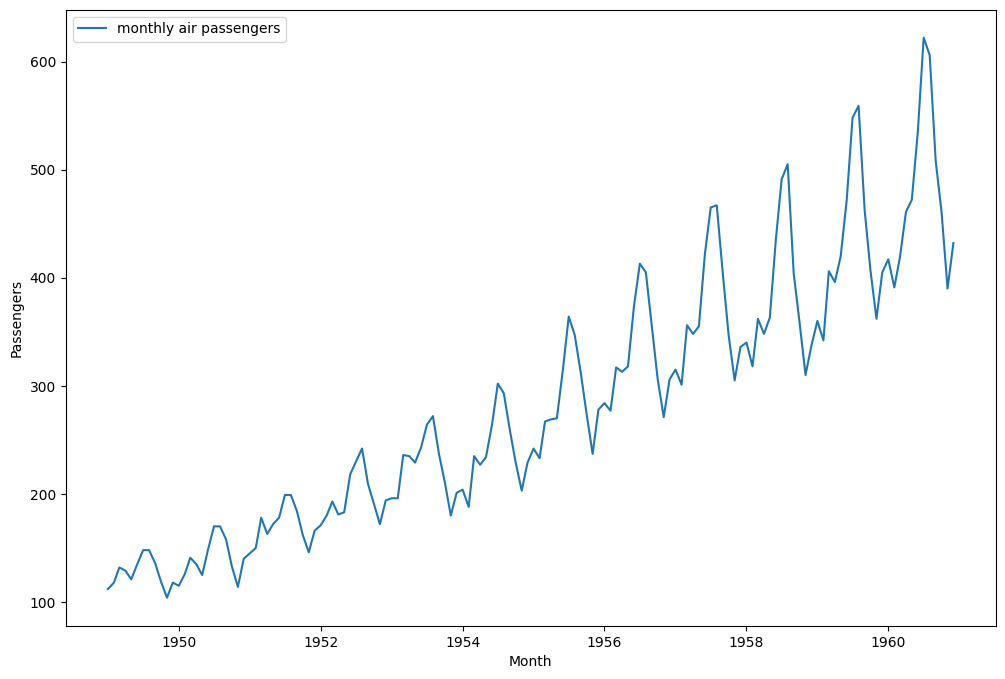

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df['Passengers'],label = 'monthly air passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

this is not stationary

1. trend (does it increase over time)
2. seasonality (repeated yearly pattern)
3. noise (randomness)

In [10]:
# augmented dicky fuller test
result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])  # probablity value

ADF Statistic: 0.815369
p-value: 0.991880


In [11]:
result

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

stationary means constant mean,varience,and correlation over time

ARIMA need stationary data to work properly

p value >0.05 not stationary - we must transform it

In [12]:
if result[1] > 0.05:
  print('data is not stationary')
else:
  print('data is stationary')

data is not stationary


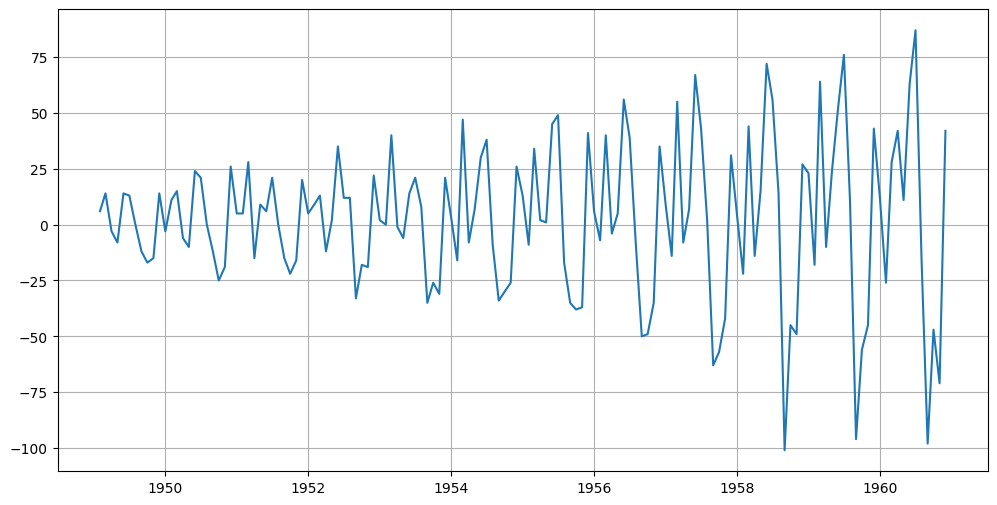

In [14]:
df_diff = df['Passengers'].diff().dropna()

plt.figure(figsize=(12,6))
plt.plot(df_diff)
plt.grid(True)

In [15]:
df_diff.head()

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [ ]:
# now here no trend (no increase or decrease)
# .diff() calculates the difference between each time point and the previous one
# this removes trend and helps to make the series stationary
# we drop the first nan value caused by differencing
# after differening there is no upword or downword trend

In [16]:
# augmented dicky fuller test
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])  # probablity value

ADF Statistic: -2.829267
p-value: 0.054213


In [17]:
# fit arima model
#order -(p,d,q)
model = ARIMA(df['Passengers'],order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 09 Dec 2025   AIC                           1394.683
Time:                        14:46:33   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [20]:
forecast = model_fit.forecast(steps=12) # next 12 months
forecast

,predicted_mean
1961-01-01,475.735059
1961-02-01,454.996073
1961-03-01,464.830415
1961-04-01,460.167010
1961-05-01,462.378378
1961-06-01,461.329756
1961-07-01,461.827008
1961-08-01,461.591213
1961-09-01,461.703026
1961-10-01,461.650005


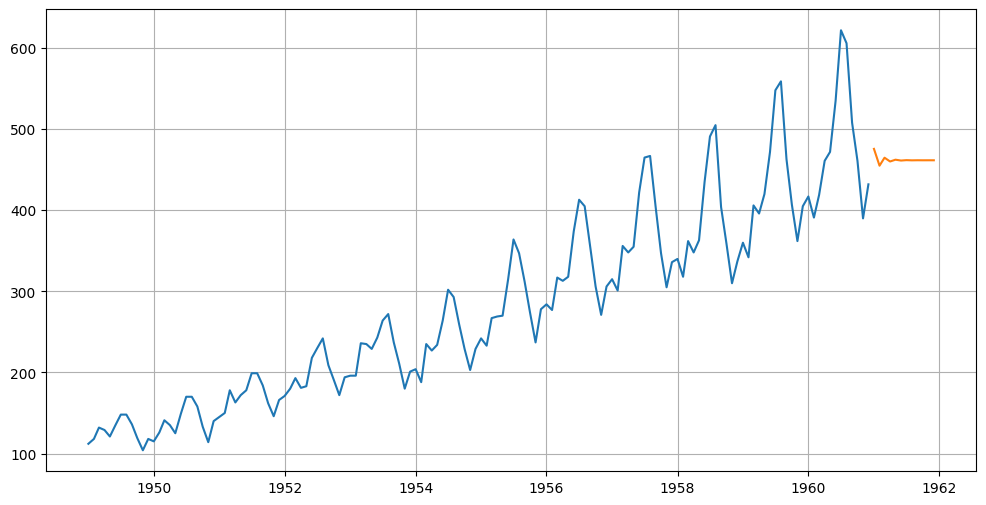

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'])
plt.plot(forecast)
plt.grid(True)

In [ ]:
#  using df_diff dataframe ##################################

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


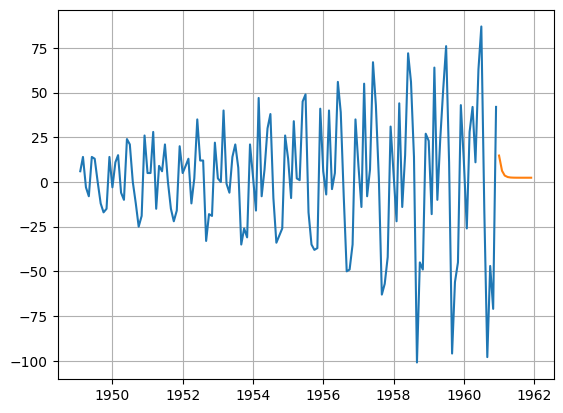

In [19]:
model = ARIMA(df_diff,order=(1,1,1))
model_fit1 = model.fit()
forecast1 = model_fit1.forecast(steps=12) # next 12 months

plt.plot(df_diff)
plt.plot(forecast1)
plt.grid(True)

In [ ]:
# SARIMA

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


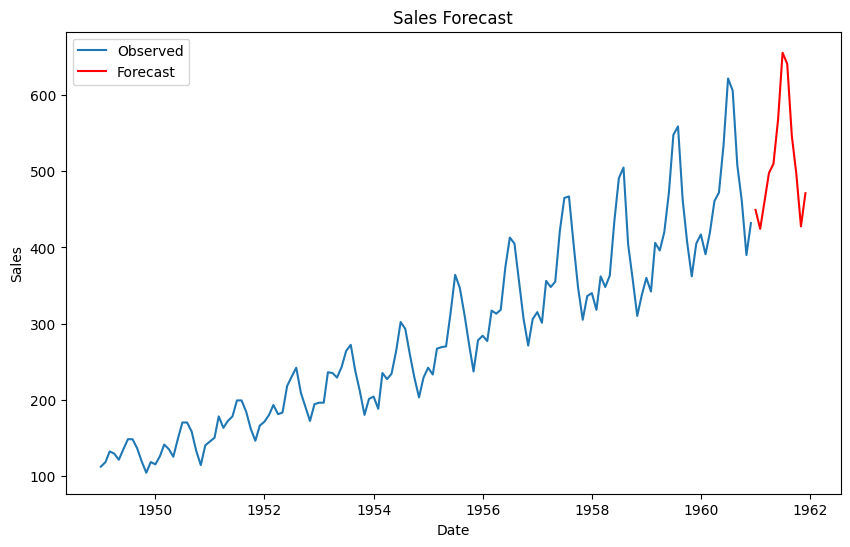

In [24]:
forecast_periods = 12
forecast = results.forecast(steps=forecast_periods)

plt.figure(figsize=(10, 6))
plt.plot(df, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
observed = df[-forecast_periods:]
mae = mean_absolute_error(observed, forecast)
mse = mean_squared_error(observed, forecast)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 36.15420812686724
MSE: 1313.1704425770095
